In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np

best = pd.read_csv('bestseller_genders.tsv', sep = '\t')
print(best.shape)
best.head(10)

(1121, 10)


,Name,Gender,PercentFemale,PercentMale,RangeStart,RangeEnd,nothing,year,author,title
0,Mary,F,99.6,0.4,1880,1895,0,1900,"Johnston, Mary",To Have and To Hold
1,Mary,F,99.6,0.4,1880,1895,1,1900,"Cholmondeley, Mary",Red Pottage
2,Robert,M,0.5,99.5,1880,1895,2,1900,"Grant, Robert",Unleavened Bread
3,James Lane,M,0.5,99.5,1880,1895,3,1900,"Allen, James Lane",The Reign of Law
4,Irving,M,0.0,100.0,1880,1895,4,1900,"Bacheller, Irving",Eben Holden
5,Paul Leicester,M,0.8,99.2,1880,1895,5,1900,"Ford, Paul Leicester",Janice Meredith
6,Charles Frederic,M,0.6,99.4,1880,1895,6,1900,"Goss, Charles Frederic",The Redemption of David Corson
7,Winston,M,0.0,100.0,1880,1895,7,1900,"Churchill, Winston",Richard Carvel
8,Charles,M,0.6,99.4,1880,1895,8,1900,"Major, Charles",When Knighthood Was in Flower
9,Maurice,M,0.0,100.0,1880,1895,9,1900,"Thompson, Maurice",Alice of Old Vincennes


In [10]:
best = best[best.Gender != 'U']
equiv = {'M': 0, 'F' : 1}
best['intgender'] = best.Gender.map(equiv)
year2dec = dict()
for i in range(1900, 2000):
    year2dec[i] = 10 * (i // 10)
best['decade'] = best.year.map(year2dec)
best.shape

(1113, 12)

In [11]:
by_year = best.groupby('decade')
pctwomen = by_year.aggregate(np.mean)
import matplkotpctwomen

,PercentFemale,PercentMale,RangeStart,RangeEnd,nothing,year,intgender
decade,,,,,,,
1900,30.651000,63.349000,1880.000000,1899.500000,49.500000,1904.500000,0.310000
1910,37.546939,46.126531,1880.000000,1909.530612,149.755102,1914.530612,0.367347
1920,36.216832,48.931683,1880.000000,1919.475248,250.000000,1924.475248,0.376238
1930,41.184848,50.734343,1880.000000,1929.474747,350.232323,1934.474747,0.424242
1940,29.778000,58.222000,1880.000000,1939.500000,450.500000,1944.500000,0.310000
1950,24.984000,66.016000,1884.500000,1949.500000,550.500000,1954.500000,0.250000
1960,23.601010,71.348485,1894.515152,1959.515152,650.000000,1964.515152,0.252525
1970,20.876364,74.578182,1904.863636,1969.863636,754.500000,1974.863636,0.218182
1980,26.443333,71.556667,1914.500000,1979.500000,884.500000,1984.500000,0.266667


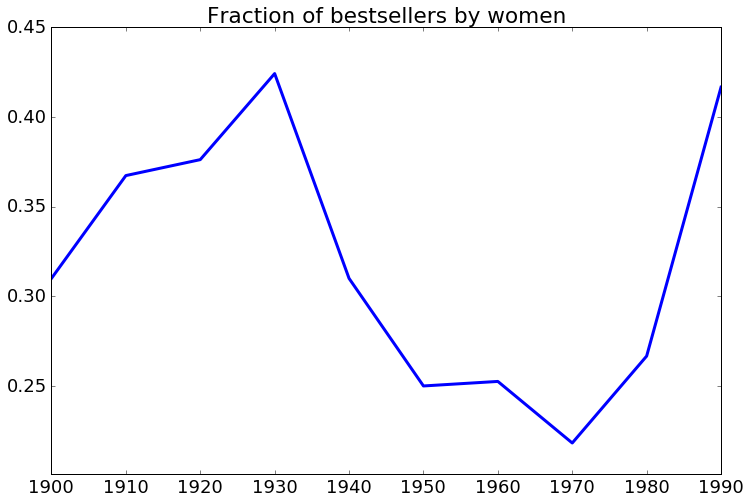

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(pctwomen.index, pctwomen.intgender, linewidth = 3)
ax.set_title('Fraction of bestsellers by women')
ax.set_ylim(0.201, 0.45)
fig.savefig('bestsellers.png')
plt.show()